In [2]:
# Adds link to the scripts folder
import sys
import os
sys.path.append("../scripts/")
import matplotlib.pyplot as plt
import numpy as np

import filenames
from hivevo.patients import Patient

from traj_characterisation import *

# Plotting trajectory duration and lengths for all patients

In [2]:
def get_duration_distribution(trajectory_list):
    time_bins = np.linspace(0, 2000, 100)
    nb_traj = []

    for time in time_bins:
        filtered_traj = filter(trajectory_list, f"traj.t[-1] >= {time}")
        nb_traj = nb_traj + [len(filtered_traj)]
    return time_bins, nb_traj


def plot_duration_distribution(time_bins, nb_traj, freq_min, fontsize=16):
    plt.figure()
    plt.title(f"Trajectory duration freq>{round(freq_min,1)}", fontsize=fontsize)
    plt.plot(time_bins, nb_traj, '.-')
    plt.xlabel("t [days]", fontsize=fontsize)
    plt.ylabel("#Trajectories > t", fontsize=fontsize)
    plt.grid()


def plot_length_distribution(trajectory_list, freq_min, fontsize=16):
    plt.figure()
    plt.title(f"Trajectory length freq>{round(freq_min,1)}", fontsize=fontsize)
    plt.hist([len(x.t) for x in trajectory_list], bins=range(12), align="left", rwidth=0.7)
    plt.xlabel("Length", fontsize=fontsize)
    plt.ylabel("#Trajectories", fontsize=fontsize)


## Creating list with all trajectories from all patients

In [3]:
patient_names = ["p1", "p2", "p3", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "env"
trajectories = []

for patient_name in patient_names:
    patient = Patient.load(patient_name)
    aft = patient.get_allele_frequency_trajectories(region)
    trajectories = trajectories + create_trajectory_list(patient, region, aft)

## Plotting duration

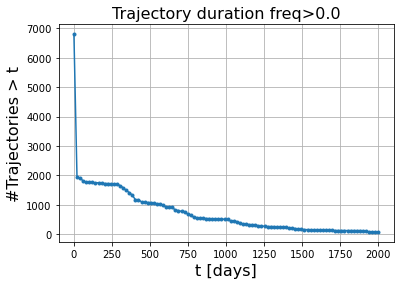

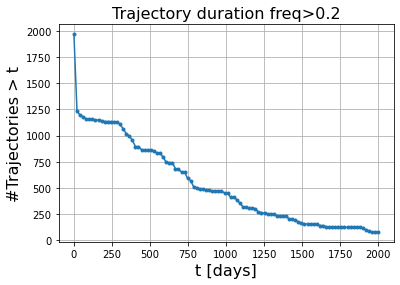

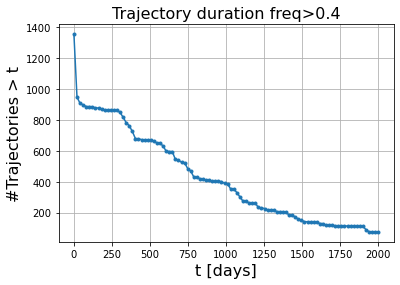

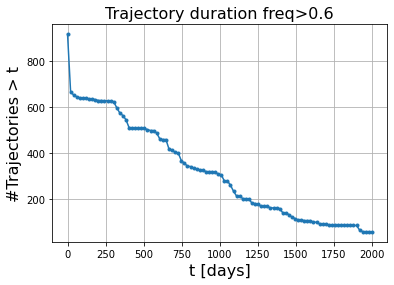

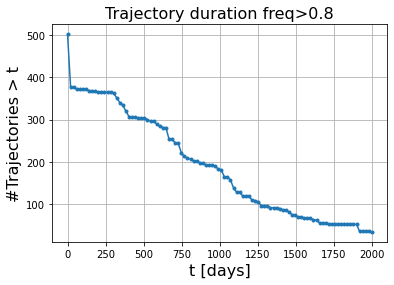

In [4]:
for freq_min in np.arange(0, 1, 0.2):
    filtered_traj = [traj for traj in trajectories if np.sum(traj.frequencies > freq_min, dtype=bool)]
    time_bins, nb_traj = get_duration_distribution(filtered_traj)
    plot_duration_distribution(time_bins, nb_traj, freq_min)
plt.show()

## Plotting length

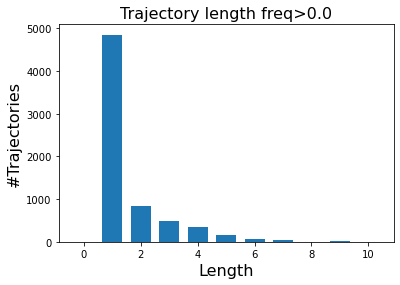

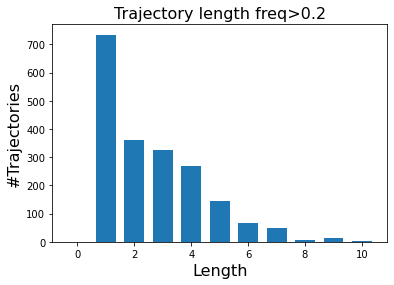

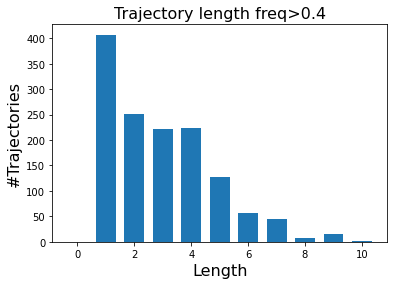

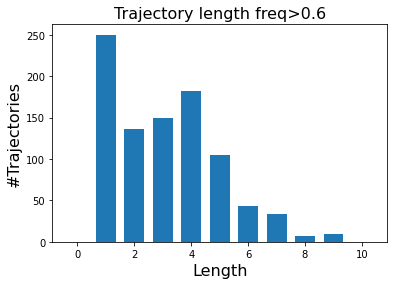

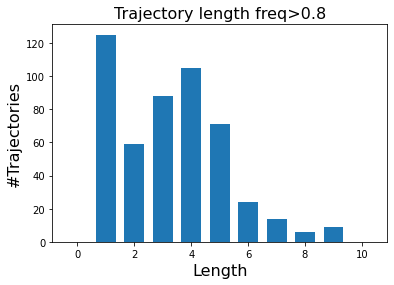

In [5]:
for freq_min in np.arange(0, 1, 0.2):
    filtered_traj = [x for x in trajectories if np.sum(x.frequencies > freq_min, dtype=bool)]
    plot_length_distribution(filtered_traj, freq_min)
plt.show()

# Number of trajectories seen in each frequency bins

In [12]:
def get_freq_distribution(trajectories, nb_bin=10, bin_range=[0.01, 0.99]):
    frequency_bins = np.linspace(bin_range[0], bin_range[1], nb_bin)
    nb_in = []
    for ii in range(len(frequency_bins) - 1):
        nb = len([traj for traj in trajectories if np.sum(np.logical_and(
            traj.frequencies >= frequency_bins[ii], traj.frequencies < frequency_bins[ii + 1]), dtype=bool)])
        nb_in = nb_in + [nb]

    return frequency_bins, nb_in

def plot_freq_ditribution(frequency_bins, nb_in, fontsize=16):
    frequency_bins = 0.5 * (frequency_bins[:-1] + frequency_bins[1:])
    plt.figure()
    plt.title("Distribution of trajectories in freq", fontsize=16)
    plt.plot(frequency_bins, nb_in, '.-')
    plt.xlabel("Frequency bin center", fontsize=16)
    plt.ylabel("# Trajectories", fontsize=16)
#     plt.yscale("log")
    plt.xlim([0, 1])
    plt.grid()

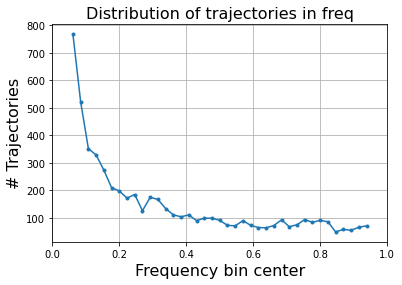

In [48]:
frequency_bins, nb_in = get_freq_distribution(trajectories, nb_bin=40, bin_range=[0.05, 0.95])
plot_freq_ditribution(frequency_bins, nb_in)

plt.show()

In [3]:
def get_nonuniform_bins(nb_bins, type="quadra", bin_range=[0.05, 0.95]):
    if type not in ["quadra", "log"]:
        raise ValueError("Type of bins must be either quadra or log.")

    if type == "quadra":
        bins = np.linspace(bin_range[0], bin_range[1], nb_bins + 1)
        non_uniform_bins = bins * bins
        return non_uniform_bins
    elif type == "log":
        return np.logspace(np.log10(bin_range[0]), np.log10(bin_range[1]), nb_bins + 1)
    
    
plt.figure()
for nb_bin in [10, 20, 30]:
    non_uniform_bins = get_nonuniform_bins(nb_bin, type="quadra")
    nb_in = []
    for ii in range(len(non_uniform_bins) - 1):
        nb = len([traj for traj in trajectories if np.sum(np.logical_and(
            traj.frequencies >= non_uniform_bins[ii], traj.frequencies < non_uniform_bins[ii + 1]), dtype=bool)])
        nb_in = nb_in + [nb]

    non_uniform_bins = 0.5 * (non_uniform_bins[:-1] + non_uniform_bins[1:])

    plt.plot(non_uniform_bins, nb_in, label=f"{nb_bin} bins quadra")

for nb_bin in [10, 20, 30]:
    non_uniform_bins = get_nonuniform_bins(nb_bin, type="log")
    nb_in = []
    for ii in range(len(non_uniform_bins) - 1):
        nb = len([traj for traj in trajectories if np.sum(np.logical_and(
            traj.frequencies >= non_uniform_bins[ii], traj.frequencies < non_uniform_bins[ii + 1]), dtype=bool)])
        nb_in = nb_in + [nb]

    non_uniform_bins = 0.5 * (non_uniform_bins[:-1] + non_uniform_bins[1:])

    plt.plot(non_uniform_bins, nb_in, label=f"{nb_bin} bins log")

plt.xlabel("Bin frequency", fontsize=16)
plt.ylabel("# Trajectories", fontsize=16)
plt.legend()
plt.show()

NameError: name 'trajectories' is not defined

<Figure size 432x288 with 0 Axes>